In [122]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import plotly
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap

import plotnine
from plotnine import *

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

### Import de archivos: 

<b><h1>About Dataset:</h1></b>

Around 100k+ movies/tvshows scraped from the IMDB website.

Contains 3 files. 

* <b>contentDataGenre</b> contains the primary key and genres of the movie data in contendDataPrime.

* <b>contentDataRegion</b> contains the primary key and regions of the movie data in contendDataPrime.
All region, genre, and contentdataprime data is taken directly from the IMDB website.

* <b>contentDataPrime</b> is the main analysis data.
 
-1 represents a missing number value and null represents a missing string or date value.

In [123]:
# Importamos los archivos de análisis
genre = pd.read_csv('../dataset/contentDataGenre.csv')

prime = pd.read_csv('../dataset/contentDataPrime.csv')

region = pd.read_csv('../dataset/contentDataRegion.csv')


# Añadimos dataset de países para poder pintar el mapa

#country = gpd.read_file('./World_Countries/World_Countries.shp')



### Preprocesado de los datos: 



In [124]:
prime.head()

,dataId,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description
0,102795,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,NaN,"The story revolves around Mohanasundaram, a re..."
1,102796,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...
2,102797,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n
3,102798,movie,Don't Look,71,2018,-1,349,2.8,-1,NaN,"In the tradition of classic horror movies, ""Do..."
4,102799,movie,The Escape from Auschwitz,80,2020,-1,349,1.7,-1,TV-MA,After capturing Kazimierz Piechowski at the Hu...


In [125]:
genre.head()

,dataId,genre
0,102795,Drama
1,102796,Documentary
2,102796,Comedy
3,102797,Documentary
4,102797,Horror


In [126]:
region.head()

,dataId,region
0,102795,India
1,102796,United States
2,102797,United States
3,102798,United States
4,102799,United Kingdom


### Unimos los dataset:


In [127]:
genre_region = pd.merge(left=region,right=genre,on='dataId',how='inner')

imdb = pd.merge(left=prime,right=genre_region,on='dataId',how='left')

In [128]:
imdb.head()

,dataId,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description,region,genre
0,102795,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,NaN,"The story revolves around Mohanasundaram, a re...",India,Drama
1,102796,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...,United States,Documentary
2,102796,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...,United States,Comedy
3,102797,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n,United States,Documentary
4,102797,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n,United States,Horror


Los -1 son valores missing -- los reemplamos por NaN y eliminaremos aquellas filas que no tengan año de lanzamiento. 

In [129]:
df_imdb = imdb.replace(-1,np.nan)
#-------------------------------------------------#
df_imdb.dropna(subset=["releaseYear"],inplace=True)
df_imdb.dropna(subset=["gross"],inplace=True)
df_imdb.drop('endYear',inplace=True,axis=1)
df_imdb.drop('certificate',inplace=True,axis=1)

In [130]:
df_imdb.head()

,dataId,contentType,title,length,releaseYear,votes,rating,gross,description,region,genre
49,102813,movie,In the Spirit,94,1990.0,349.0,5.1,280000.0,Marianne moves back to a nightmare New York Ci...,United States,Comedy
92,102832,movie,Henri Cartier-Bresson: The Impassioned Eye,72,2003.0,349.0,7.3,30000.0,Artist Henri Cartier-Bresson comments on sever...,Switzerland,Documentary
93,102832,movie,Henri Cartier-Bresson: The Impassioned Eye,72,2003.0,349.0,7.3,30000.0,Artist Henri Cartier-Bresson comments on sever...,Switzerland,Biography
242,102905,movie,Murder in the Woods,88,2021.0,348.0,3.7,350000.0,Soon after arriving to a mysterious cabin in t...,United States,Horror
243,102905,movie,Murder in the Woods,88,2021.0,348.0,3.7,350000.0,Soon after arriving to a mysterious cabin in t...,United States,Mystery


In [131]:
df_imdb.isnull().sum()

dataId         0
contentType    0
title          0
length         0
releaseYear    0
votes          0
rating         0
gross          0
description    0
region         0
genre          0
dtype: int64

In [132]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53609 entries, 49 to 279477
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dataId       53609 non-null  int64  
 1   contentType  53609 non-null  object 
 2   title        53609 non-null  object 
 3   length       53609 non-null  object 
 4   releaseYear  53609 non-null  float64
 5   votes        53609 non-null  float64
 6   rating       53609 non-null  float64
 7   gross        53609 non-null  float64
 8   description  53609 non-null  object 
 9   region       53609 non-null  object 
 10  genre        53609 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 4.9+ MB


Con la información limpia, pasamos a añadir la columna obtenida de otra fuente para enriquecer el dataset con la ubicacion de los paíes

In [133]:
'''country.COUNTRY = country.COUNTRY.str.upper()

df_imdb.region = df_imdb.region.str.upper()'''

'country.COUNTRY = country.COUNTRY.str.upper()\n\ndf_imdb.region = df_imdb.region.str.upper()'

In [134]:
'''data = pd.merge(left=df_imdb,right=country,left_on="region",right_on="COUNTRY",how="left")
data.head()'''

'data = pd.merge(left=df_imdb,right=country,left_on="region",right_on="COUNTRY",how="left")\ndata.head()'

In [135]:
# Generamos una copia del dataset
data = df_imdb.copy()


Creamos dos variables nuevas: 
* score -- Nos divide el rating obtenido por las peliculas en Low Rating , Si la puntuación obtenida es inferior a 5 , Mid rating si esta entre 5 y 7.5 y High Rating para puntuaciones superiores a 7.5
* score_new -- Nos otorga un peso del 70 % al rating obtenido de la película y un 30 % al numero de votaciones para poder ver las mejores películas en cuanto a rating y votos. 

In [136]:
# Variable score
data["score"]= data["rating"].map(lambda x: "Low Rating" if x<5 else( "Mid Rating" if x>=5 and x<7.5 else( "High Rating")))
# Variable score_new
data["score_new"]= data["rating"] * 0.7 + data["votes"] * 0.3

Generamos un diccionario para agrupar las categorias de las películas

In [137]:

# Define el diccionario de géneros y sus categorías más amplias
genre_dict = {
    'Comedy': 'Comedy',
    'Documentary': 'Documentary',
    'Biography': 'Documentary',
    'Horror': 'Horror/Thriller',
    'Mystery': 'Horror/Thriller',
    'Thriller': 'Horror/Thriller',
    'Drama': 'Drama',
    'Romance': 'Romance',
    'Crime': 'Crime',
    'Western': 'Action',
    'History': 'Documentary',
    'Family': 'Family',
    'Sport': 'Sport',
    'Action': 'Action',
    'Musical': 'Music',
    'Adventure': 'Animation',
    'War': 'Action',
    'Music': 'Music',
    'News': 'Documentary',
    'Short': 'Other',
    'Fantasy': 'Fantasy/Sci-Fi',
    'Sci-Fi': 'Fantasy/Sci-Fi',
    'Animation': 'Animation',
    'Film-Noir': 'Other',
    'Reality-TV': 'Other'
}

# Crea una nueva columna con las categorías amplias
data['category'] = data['genre'].replace(genre_dict)

# Agrupa por categoría y cuenta el número de películas en cada categoría
category_count = data.groupby('category')['dataId'].count()

# Crea un gráfico de barras con la cuenta de películas por categoría
import plotly.express as px

fig = px.bar(category_count, x=category_count.index, y=category_count.values)
fig.show()


### <h1>Visualización dataset</h1>
##### Principal
Objetivo del análisis: 
Realizar un análisis descriptivo del dataset peliculas 
##### Secundarios
Objetivos:

* Ver la diferencia de gustos con el paso del tiempo en generos medido por el rating
* Ver la diferencia entre 1925 y 2023 en cuanto a acceso a peliculas y gusto e interés por el cine.
* Ver si la calidad de las películas ha variado con el paso del tiempo.  
* Estudio de los ingresos obtenidos en función a las variables de estudio. 
* Análisis de la descripción utilizada en las películas 
* Ver si las que mas ingresos obtienen son las que tienen mejor rating/votos. 



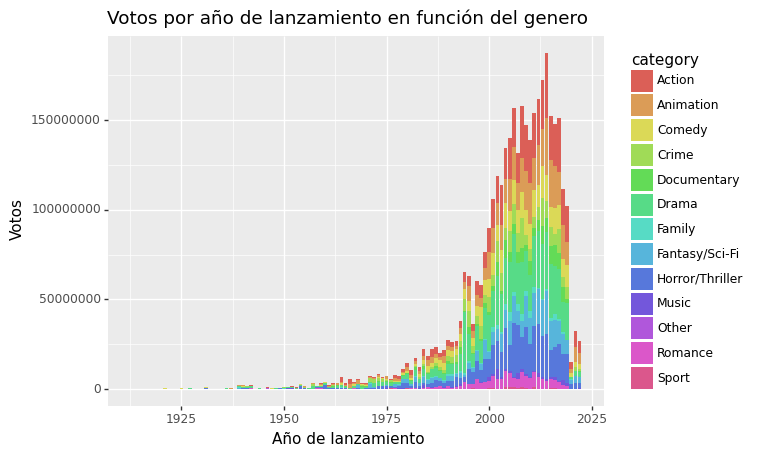

<ggplot: (8768016930783)>

In [138]:
(
    ggplot(data)
    + aes(x ="releaseYear",y="votes",fill="category")  
    + geom_col(position="stack")
    + labs(title="Votos por año de lanzamiento en función del genero", x="Año de lanzamiento", y="Votos", color="Leyenda")

    
)




Los gustos cambian de  manera suavizada con el paso de los años no vemos un varaición grande en cuanto a generos, en momentos puntuales podriamos ver que los generos de acción no sean los primeros
pero de forma general vemos que se mantienen estable, aunque tambien vemos que la mayor cantidad de votos se concentran a partir del año 2000 con el acceso a internet, momento en el que las personas empezaron a tener acceso a un mayor catalogo de películas y votar y comentar en foros de discusión sobre estas. 

### Veamos si antes había mejores películas que ahora: 

La valoración general es que antes se hacian películas con las que se ganaba menos dinero pero el rating era de forma general de más calidad. Ahora hay más peliculas que conllevan una mayor cantidad de ingresos pero no de una calidad tan alta. 

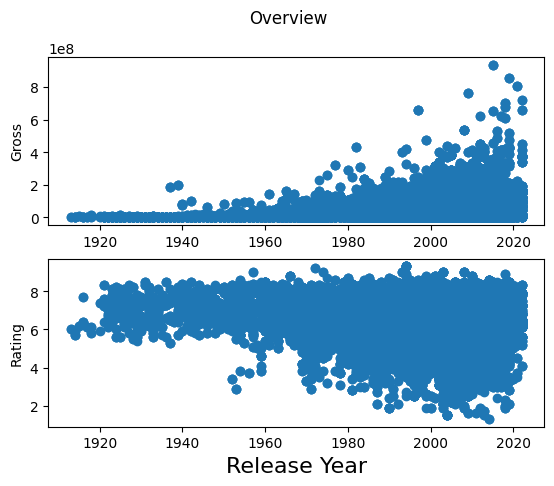

In [139]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Overview')

ax1.scatter(data.releaseYear,data.gross)
ax1.set_ylabel('Gross')
ax2.scatter(data.releaseYear,data.rating)
ax2.set_ylabel('Rating')
ax2.set_xlabel('Release Year',fontsize=16)


plt.show()

# Estudio del ingreso obtenido en función de las variables de estudio

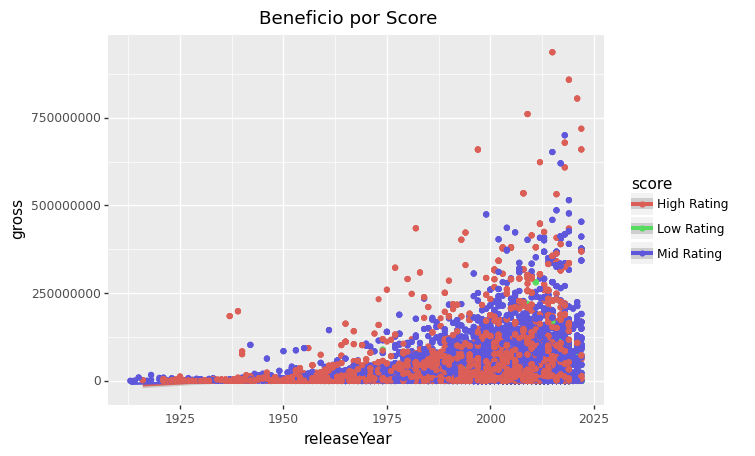

<ggplot: (8768067162884)>

In [140]:
(
    ggplot(data)  # What data to use
    + aes(x = 'releaseYear', 
          y = 'gross',
         color = "score")  # What variable to use
    + geom_smooth(method = 'lm')  
    + geom_point()# Geometric object to use for drawing
    + ggtitle("Beneficio por Score")
)

Vemos que no influye tanto en el ingreso el rating obtenido como el año de lanzamiento de la película, actualmente el ingreso es mayor que antes.

Ademas si relaciones el numero de votos con el score vemos que cuanto mas rating mas votos hay

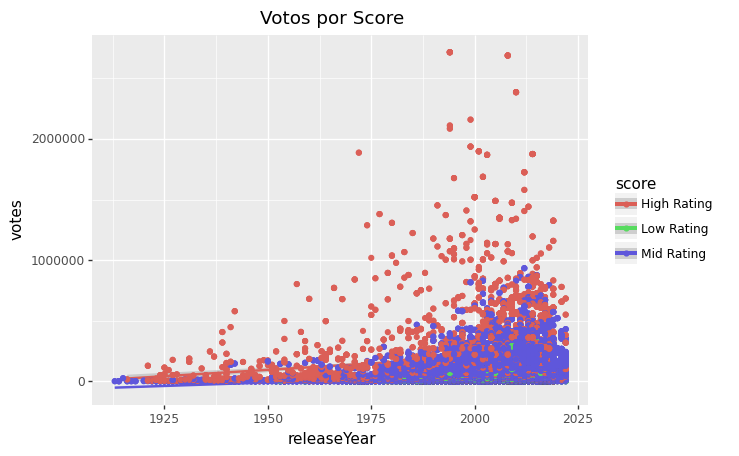

<ggplot: (8768067162869)>

In [141]:
(
    ggplot(data)  # What data to use
    + aes(x = 'releaseYear', 
          y = 'votes',
         color = "score")  # What variable to use
    + geom_smooth(method = 'lm')  
    + geom_point()# Geometric object to use for drawing
    + ggtitle("Votos por Score")
)

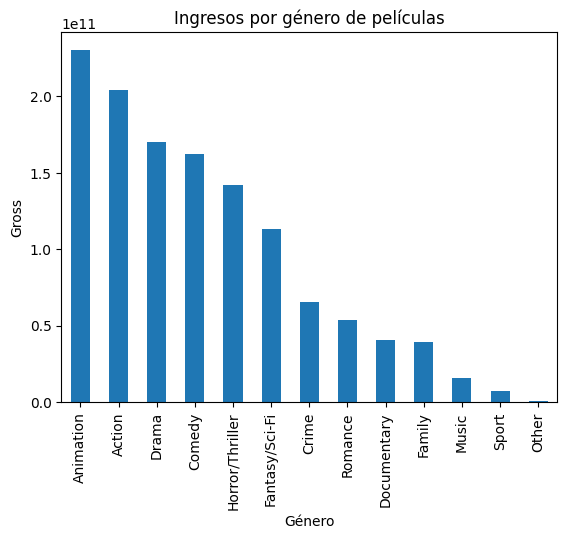

In [142]:
# Agrupar los ingresos por género
ingresos_por_genero = data.groupby("category")["gross"].sum()

# Ordenar los ingresos por género de manera descendente
ingresos_por_genero = ingresos_por_genero.sort_values(ascending=False)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar un gráfico de barras para cada género
ingresos_por_genero.plot(kind="bar", ax=ax)

# Establecer los títulos y las etiquetas de los ejes
ax.set_title("Ingresos por género de películas")
ax.set_xlabel("Género")
ax.set_ylabel("Gross")

# Mostrar la figura
plt.show()

El mayor ingreso viene de los generos que se mantienen en cuanto a gustos además más estables en el tiempo, menos con la categoria animación que se convierte en la que mas benefecios obtiene, seguida de la categoría acción que se mantiene estable en cuanto a gustos en el tiempo, seguido de drama , comedia , Horror / thriller y Ciencia ficción.

## Hagamos un mapa para ver en que países se concentran la mayor parte de beneficios.

In [143]:
'''fig = px.choropleth(data,
                   locationmode='country names',
                   locations=data['region'],
                   color=data['gross'],
                   color_continuous_scale='viridis',
                   range_color=[4000000, 93666000])                   
fig.show()'''

"fig = px.choropleth(data,\n                   locationmode='country names',\n                   locations=data['region'],\n                   color=data['gross'],\n                   color_continuous_scale='viridis',\n                   range_color=[4000000, 93666000])                   \nfig.show()"

Vemos como se distribuyen las zonas amarillas con unos ingresos más altos y las zonas oscuras con menos ingresos. 


Veamos con el paso de los años si siguen siendo los mismos países los que mas ingresos generan. 

In [144]:
# agrupar los datos por año de lanzamiento y región y sumar el ingreso
grouped_data = data.groupby(['releaseYear', 'region'], as_index=False).agg({'gross': 'sum'})

# obtener el país que más ingreso generó en cada año
top_countries = grouped_data.loc[grouped_data.groupby('releaseYear')['gross'].idxmax()]
top_countries = top_countries.rename(columns={'region': 'top_region', 'gross': 'top_gross'})

In [145]:
for i in top_countries.top_region.unique():
    print(f"El país que más ingresos genera cada año siempre es {i}")

El país que más ingresos genera cada año siempre es United States


Veamos la evolución segun el rating por category. 

In [152]:
# agrupar los datos por año de lanzamiento y región en función del rating obtenido por numero de votos y calificación
grouped_data_rating = data.groupby(['releaseYear', 'category'], as_index=False).agg({'score_new': 'sum'})

# obtener el país que más rating obtuvo en cada año
top_countries_rating = grouped_data_rating.loc[grouped_data_rating.groupby('releaseYear')['score_new'].idxmax()]
top_countries_rating = top_countries_rating.rename(columns={'region': 'top_region', 'score_new': 'top_rating'})

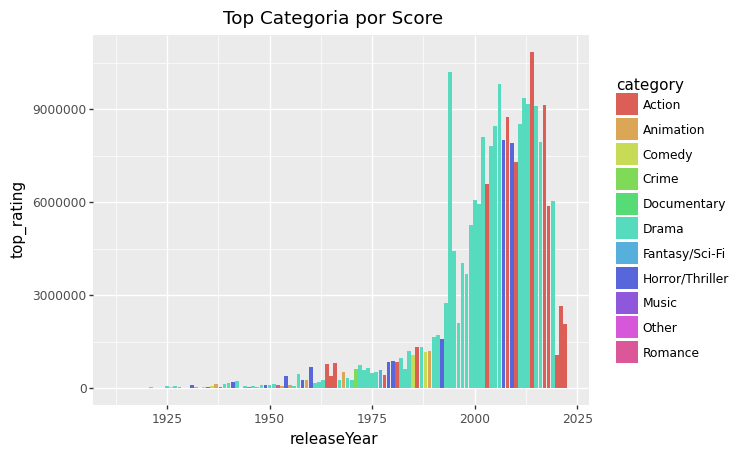

<ggplot: (8768121328466)>

In [198]:
(
    ggplot(top_countries_rating)
    + aes(x='releaseYear', y='top_rating', fill='category')
    + geom_col(position='dodge')
    + ggtitle("Top Categoria por Score")
)




Durante los años 90 - 2000 la mejor categoria fue el drama a pesar de que es en acción cuando vemos el top de rating

In [208]:
filtro_años = data.releaseYear > 1970
data_ingresos = data[filtro_años]

In [212]:
# agrupamos los datos por 'releaseYear','category', 'region'

grouped_data_gross = data_ingresos.groupby(['releaseYear','category', 'region']).agg({'gross': 'sum','score_new':'sum'}).reset_index()

grouped_data_gross["gross_norm"] = ((grouped_data_gross.gross)/grouped_data_gross.gross.max())*100
grouped_data_gross["score_norm"] = (grouped_data_gross.score_new/grouped_data_gross.score_new.max())*100

Pintamos un grafico dinámico con las transformaciones necesarias para ver la realción entre el score y el ingreso con el paso de los años.

In [261]:
px.scatter(grouped_data_gross, 
           x="gross_norm", 
           y="score_norm", 
           animation_frame="releaseYear", 
           animation_group="region",
           color="region", 
           hover_name="region",
           range_x=[-2,15],
           range_y=[-2,15],
           size="score_new",
           size_max=325)
           


Para poder ver esta grafica se han normalizado los datos de ingresos y score en porcentaje para poder verlos, debido a la distrubición que tienen ambas variables. 

Se ve que conforme pasan los años el score suele ser mayor en relacion con el beneficio.

### Analizamos la descripción de las películas:
Con el objetivo de ver que palabras son las más utilizadas por las productoras a la hora de describir una película

In [263]:
movies_df = data.copy()


descriptions = movies_df['description'].dropna()


In [265]:
def generate_wordcloud(text):
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)
    # Crear WordCloud
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          min_font_size=10).generate(text)
    # Mostrar WordCloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


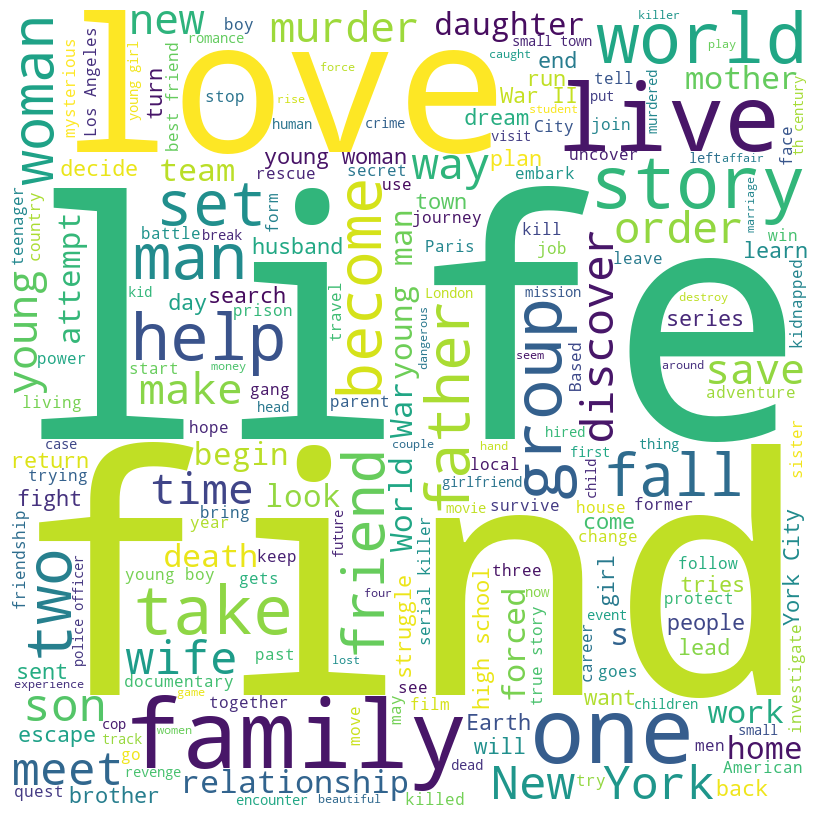

In [266]:
all_descriptions = ' '.join(descriptions.tolist())
generate_wordcloud(all_descriptions)


Vemos que las palabras Find, Family ,Life , Love ,story salen más grandes al ser las más utilizadas, asociada a descripiciones de peliculas de acción, darama o suspense como la palabra murder. 

Ahora que tenemos una visión general del conjutno de datos, entendiendo que variables afectan mas al beneficio y como se comportan los gustos a lo largo del tiempo.

Veamos con un gráfico dash las mejores peliculas para cada categoria según la variable score_new obtenida.

In [267]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Cargar datos
df = movies_df.copy()

# Filtrar por género
genres = df['category'].unique()
genre_options = [{'label': genre, 'value': genre} for genre in genres]

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Definir el layout de la aplicación
app.layout = html.Div([
    html.H1('Las cinco mejores películas'),
    dcc.Dropdown(
        id='genre-dropdown',
        options=genre_options,
        value=genres[0]
    ),
    dcc.Graph(id='top-movies-graph')
])

# Definir la función que devuelve los datos filtrados
def get_top_movies(genre):
    genre_df = df[df['category'] == genre]
    top_movies = genre_df.sort_values('score_new', ascending=False).head(5)
    return top_movies

# Definir la función que actualiza el gráfico
@app.callback(
    Output('top-movies-graph', 'figure'),
    [Input('genre-dropdown', 'value')]
)
def update_graph(genre):
    top_movies = get_top_movies(genre)
    figure = {
        'data': [{'x': top_movies['title'], 'y': top_movies['score_new'], 'type': 'bar'}],
        'layout': {
            'title': f'Las cinco mejores películas de {genre}',
            'xaxis': {'title': 'Título'},
            'yaxis': {'title': 'Score'}
        }
    }
    return figure

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server()


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
